In [2]:
import warnings
warnings.simplefilter('ignore', category=FutureWarning)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import pydataset as pds

from env import host, user, password

In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [ ]:
# Create a pandas dataframe from df_iris
df_iris = pds.data('iris')
df_iris.head()

In [ ]:
# print the first 3 rows of df_iris
print(df_iris.head(3))

In [ ]:
# print the column names of df_iris
print(df_iris.columns)

In [ ]:
# print the data type of each column 
print(df_iris.dtypes)

In [ ]:
# print the summary statistics for each of the numeric variables
print(df_iris.describe())

Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

Make sure that the spreadsheet is publicly visible under your sharing settings.

In [ ]:
# imported Table1_CustDetails google spreadsheet as a dataframe
gs_url = 'https://docs.google.com/spreadsheets/d/1KsnXUx76_LWWQF_lSyfrQNikfUPX70D8GxlIBvj2pXs/export?format=csv'

df_google_sheet = pd.read_csv(gs_url)
df_google_sheet.head()

In [ ]:
# assign the first 100 rows to a new dataframe, df_google_sheets_sample
df_google_sheets_sample = df_google_sheet.head(100)

In [ ]:
# print the number of rows of your original dataframe
print(len(df_google_sheet))

In [ ]:
# print the first 5 column names
print(df_google_sheets_sample.columns[:5])

In [ ]:
# print the column names that have a data type of object
print(df_google_sheets_sample.select_dtypes(include=['object']).columns)

In [ ]:
# compute the range for each of the numeric variables.
print(df_google_sheets_sample.select_dtypes(include=['int64', 'float64']).max() - df_google_sheets_sample.select_dtypes(include=['int64', 'float64']).min())

Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

In [ ]:
# create a new dataframe named df_excel from workable_innis_spreadsheet_exercises.xlsx
df_excel = pd.read_excel('workable_innis_spreadsheet_exercises.xlsx')
df_excel.head()

In [ ]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.head(100)
df_excel_sample

In [ ]:
# print the number of rows of your original dataframe
print(len(df_excel))

In [ ]:
# print the first 5 column names
print(df_excel_sample.columns[:5])

In [ ]:
# print the column names that have a data type of object
print(df_excel_sample.select_dtypes(include=['object']).columns)

In [ ]:
# compute the range for each of the numeric variables.
print(df_excel_sample.select_dtypes(include=['int64', 'float64']).max() - df_excel_sample.select_dtypes(include=['int64', 'float64']).min())

Read the data from this google sheet into a dataframe, df_google.
the data: https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/export?format=csv'
df_google = pd.read_csv(url)
df_google.head()

In [ ]:
# print the first 3 rows of df_google
print(df_google.head(3))

In [ ]:
# print the number of rows and columns of df_google
print(df_google.shape)

In [ ]:
# print the column names of df_google
print(df_google.columns)

In [ ]:
# print the data type of each column
print(df_google.dtypes)

In [ ]:
# print the summary statistics for each of the numeric variables
print(df_google.describe())

In [ ]:
# print the unique values for each of your categorical variables
print(df_google.select_dtypes(include=['object']).nunique())

DATA PREPARATION:
Exercises

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

In [ ]:
# Using the Iris Data:
# Use the function defined in acquire.py to load the iris data.
# Drop the species_id and measurement_id columns.
# Rename the species_name column to just species.
# Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).
# Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
import acquire

df = acquire.get_iris_data() # utlize acquire.py to load the iris data.

In [ ]:
def prep_iris(df): # create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.
    df = acquire.get_iris_data() # utlize acquire.py to load the iris data.
    df = df.drop(columns=['species_id', 'Unnamed: 0']) # drop the species_id and measurement_id columns.
    df = df.rename(columns={'species_name': 'species'}) # rename the species_name column to just species.
    dummy_df = pd.get_dummies(df[['species']], drop_first=True) # create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).
    df = pd.concat([df, dummy_df], axis=1) # concatenate the iris dataframe with the dummy variables.
    return df.drop(columns=['species']) # drop the species column.

prep_iris(df) # call the function prep_iris to apply the transformations to the iris data.

In [ ]:
# Using the Titanic dataset:
# Use the function defined in acquire.py to load the Titanic data.
df = acquire.get_titanic_data()
df.head()

In [ ]:
# Drop any unnecessary, unhelpful, or duplicated columns.
df = df.drop(columns=['deck', 'embarked', 'class', 'age', 'passenger_id'])
# Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.
dummy_df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.
def prep_titanic(df):
    df = acquire.get_titanic_data()
    df = df.drop(columns=['deck', 'embarked', 'class', 'age', 'passenger_id', 'Unnamed: 0'])
    # fill in missing values
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first=[True,True])
    df = pd.concat([df, dummy_df], axis=1)
    return df.drop(columns=['sex', 'embark_town'])

prep_titanic(df)


In [ ]:
# Using the Telco dataset
# Use the function defined in acquire.py to load the Telco data.
df = acquire.get_telco_data()
df.head()

Columns to drop ['Unnamed: 0', 'internet_service_type_id', 'payment_type_id', 'contract_type_id']

In [ ]:
# Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.
df = df.drop(columns=['Unnamed: 0', 'internet_service_type_id', 'payment_type_id', 'contract_type_id'])

In [ ]:
# Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.
dummy_df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.
def prep_telco(df):
    df = acquire.get_telco_data()
    df = df.drop(columns=['Unnamed: 0', 'internet_service_type_id', 'payment_type_id', 'contract_type_id'])
    dummy_df = pd.get_dummies(df[['payment_type', 'contract_type', 'internet_service_type']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df.drop(columns=['payment_type', 'contract_type', 'internet_service_type'])

prep_telco(df)
    

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

In [25]:
import prepare
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# statistical testing
from scipy import stats
# Acquire and prep iris data by pulling it from prepare.py
df = prepare.prep_iris(df)

Let me get that for you...


In [32]:
# split the iris data into training and testing sets
iris_train, iris_validate, iris_test = prepare.split_dataframe(df)
print(iris_train.shape, iris_validate.shape, iris_test.shape)


(84, 7) (36, 7) (30, 7)


Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [ ]:
# Get info about iris_train data
print(iris_train.describe().T)
print('-------------------------------------------')
print(iris_train.dtypes)

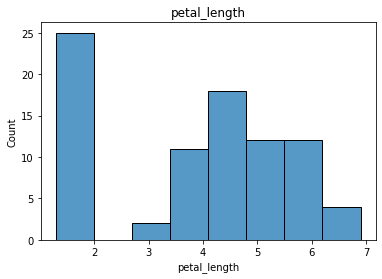

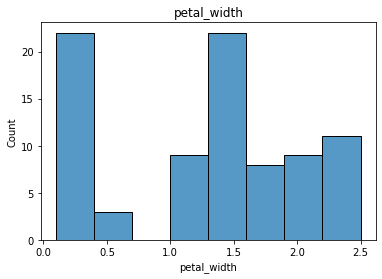

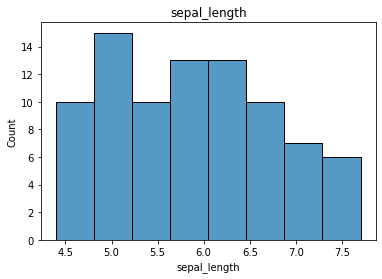

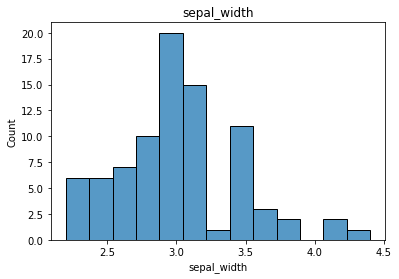

In [44]:
#For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
cat_vars = ['species']
quant_vars = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
# create a histogram for each of quantitative varaibles
for var in quant_vars:
    plt.figure()
    sns.histplot(iris_train[var])
    plt.title(var)
    plt.show()

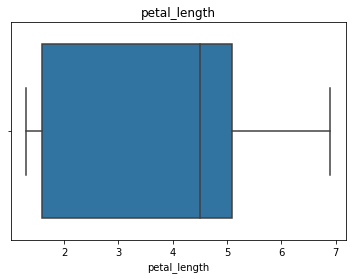

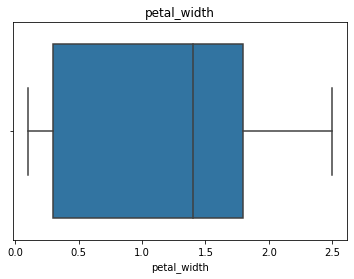

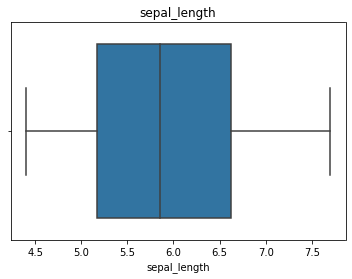

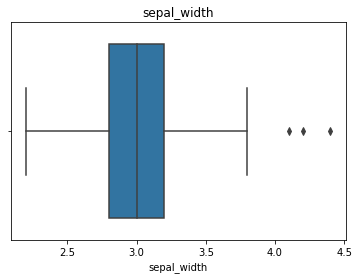

In [43]:
# Create a boxplot for each of the quantitative variables
for var in quant_vars:
    plt.show()
    sns.boxplot(iris_train[var])
    plt.title(var)
    plt.show()

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

versicolor    32
virginica     27
setosa        25
Name: species, dtype: int64


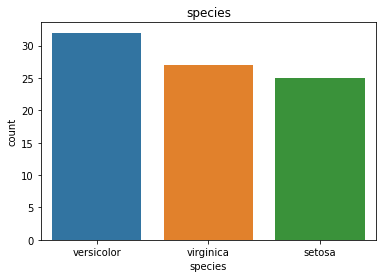

In [50]:
# create a frequency table for each of the categorical variables
print(iris_train.species.value_counts())
for var in cat_vars:
    plt.figure()
    sns.countplot(iris_train[var])
    plt.title(var)
    plt.show()

Document takeaways & any actions.

Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

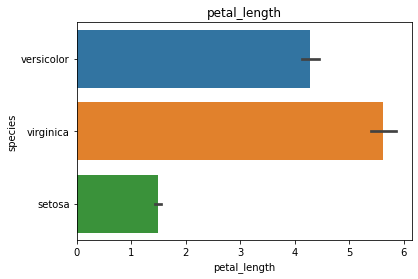

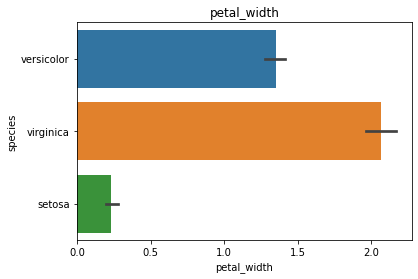

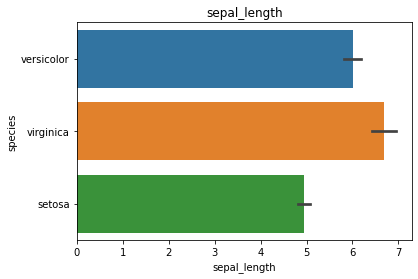

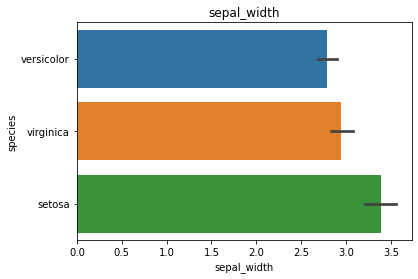

In [51]:
# Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).
for var in quant_vars:
    plt.figure()
    sns.barplot(x=iris_train[var], y=iris_train['species'])
    plt.title(var)
    plt.show()

In [53]:
# For each measurement type, lable and compute the descriptive statistics for each species.
for var in quant_vars:
    print(var)
    print(iris_train.groupby('species')[var].describe())
    print('-------------------------------------------')


petal_length
            count      mean       std  min    25%   50%    75%  max
species                                                            
setosa       25.0  1.480000  0.138444  1.3  1.400  1.50  1.500  1.9
versicolor   32.0  4.287500  0.469557  3.3  3.975  4.45  4.625  5.0
virginica    27.0  5.625926  0.613685  4.5  5.150  5.60  6.000  6.9
-------------------------------------------
petal_width
            count      mean       std  min   25%  50%  75%  max
species                                                        
setosa       25.0  0.232000  0.106927  0.1  0.20  0.2  0.2  0.6
versicolor   32.0  1.350000  0.212512  1.0  1.20  1.4  1.5  1.8
virginica    27.0  2.066667  0.275960  1.5  1.85  2.1  2.3  2.5
-------------------------------------------
sepal_length
            count      mean       std  min  25%  50%    75%  max
species                                                         
setosa       25.0  4.952000  0.342929  4.4  4.7  5.0  5.200  5.7
versicolor   32.0  

In [58]:
# For virginica & versicolor:
virginica = iris_train[iris_train['species'] == 'virginica']
versicolor = iris_train[iris_train['species'] == 'versicolor']
# Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups.
print(stats.mannwhitneyu(virginica['petal_width'], versicolor['petal_width']))


MannwhitneyuResult(statistic=845.5, pvalue=2.6237076225535216e-10)


In [74]:
# Do the same for the other measurement types.
# Determine if there is a significant difference between the two groups where the alpha = 0.05.

alpha = 0.05 # 95% confidence level

H0 = 'There is no difference between the two groups'
Ha = 'There is a difference between the two groups'

for var in quant_vars:
    print(var)
    t, p = stats.mannwhitneyu(virginica[var], versicolor[var])
    print(f't-value= {t}, p-value= {p}')
    if p < alpha:
        print(H0)
    else:
        print(Ha)
    print('-------------------------------------------')

petal_length
t-value= 844.5, p-value= 3.445395524816674e-10
There is no difference between the two groups
-------------------------------------------
petal_width
t-value= 845.5, p-value= 2.6237076225535216e-10
There is no difference between the two groups
-------------------------------------------
sepal_length
t-value= 673.0, p-value= 0.0002464185554190486
There is no difference between the two groups
-------------------------------------------
sepal_width
t-value= 525.5, p-value= 0.15415709651335313
There is a difference between the two groups
-------------------------------------------


Multivariate Stats:

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

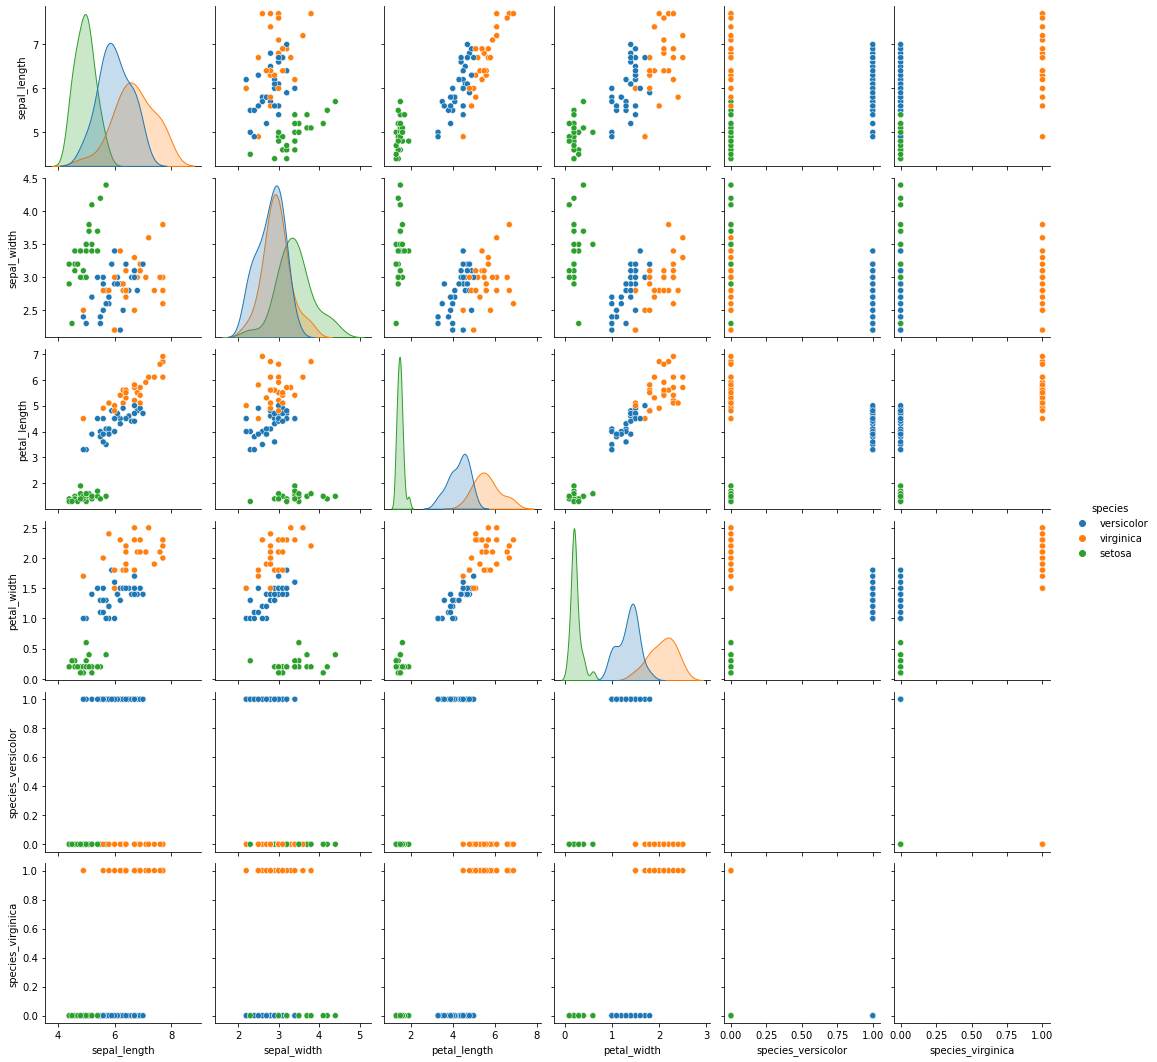

In [75]:
# Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.
sns.pairplot(iris_train, hue='species')
plt.show()

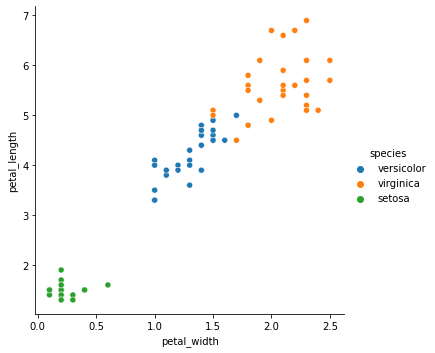

In [76]:
# Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col
sns.relplot(x='petal_width', y='petal_length', hue='species', data=iris_train)
plt.show()

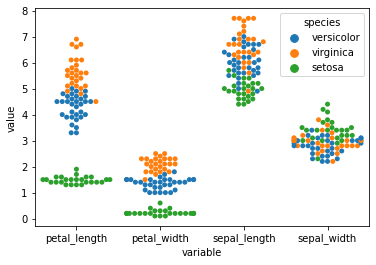

In [85]:

# melt iris_train
melted_df = pd.melt(iris_train, id_vars=['species'], value_vars=quant_vars)

# Create a swarmplot using a melted dataframe of all your numeric variables. Hint: sns.swarmplot
# The x-axis should be the variable name, the y-axis the measure. 
# Add another dimension using color to represent species.
# Document takeaways from this visualization.
sns.swarmplot(x='variable', y='value', hue='species', data=melted_df)

In [86]:
# Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? 
# Answer the question through both a plot and using a mann-whitney or t-test. 
# If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

KeyError: 'Column not found: sepal_area'

Exercises Part II:

Explore your titanic dataset more completely.

Determine drivers of the target variable
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [93]:
# Explore your titanic dataset more completely.
df = prepare.prep_titanic(df)
titanic_train, titanic_validate, titanic_test = prepare.split_dataframe(df)
print(titanic_train.shape, titanic_validate.shape, titanic_test.shape)
print('-------------------------------------------')
print(titanic_train.describe().T)
print('-------------------------------------------')
print(titanic_train.dtypes)


Let me get that for you...
(498, 9) (214, 9) (179, 9)
-------------------------------------------
                         count       mean        std  min     25%      50%  \
survived                 498.0   0.381526   0.486250  0.0  0.0000   0.0000   
pclass                   498.0   2.311245   0.837690  1.0  2.0000   3.0000   
sibsp                    498.0   0.532129   1.178262  0.0  0.0000   0.0000   
parch                    498.0   0.415663   0.873207  0.0  0.0000   0.0000   
fare                     498.0  32.698986  53.537703  0.0  7.8958  14.4542   
alone                    498.0   0.614458   0.487213  0.0  0.0000   1.0000   
sex_male                 498.0   0.648594   0.477889  0.0  0.0000   1.0000   
embark_town_Queenstown   498.0   0.084337   0.278173  0.0  0.0000   0.0000   
embark_town_Southampton  498.0   0.724900   0.447014  0.0  0.0000   1.0000   

                              75%       max  
survived                  1.00000    1.0000  
pclass                    3.0

Exercises Part III

Explore your telco data to discover drivers of churn
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [94]:
# Explore the Telco dataset more completely.
df = prepare.prep_telco(df)
telco_train, telco_validate, telco_test = prepare.split_dataframe(df)
print(telco_train.shape, telco_validate.shape, telco_test.shape)
print('-------------------------------------------')
print(telco_train.describe().T)
print('-------------------------------------------')
print(telco_train.dtypes)


Let me get that for you...
(3943, 24) (1691, 24) (1409, 24)
-------------------------------------------
                                       count       mean        std   min  \
senior_citizen                        3943.0   0.163581   0.369942   0.0   
tenure                                3943.0  32.589653  24.607668   0.0   
monthly_charges                       3943.0  64.797375  29.999662  18.4   
gender_Male                           3943.0   0.510271   0.499958   0.0   
payment_type_Credit card (automatic)  3943.0   0.211768   0.408613   0.0   
payment_type_Electronic check         3943.0   0.338067   0.473112   0.0   
payment_type_Mailed check             3943.0   0.226985   0.418936   0.0   
contract_type_One year                3943.0   0.207710   0.405719   0.0   
contract_type_Two year                3943.0   0.242709   0.428775   0.0   
internet_service_type_Fiber optic     3943.0   0.436470   0.496010   0.0   
internet_service_type_None            3943.0   0.212782   0.